# Gathering Results
In order to get our methodology to work, we effectively have to either 1) reset the kernel every time or 2) run our python script from the command line. We opt for the second option since it makes more sense. 

To do this we run the following code in the command line: 
`for i in {1..100}; do python run_RF.py $i; done` 

This creates 100 feature dictionaries. We then must gather all of these up and create the final dataframe.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

num_pkls = 10  # Number of pickle files
#output_dir = 'FinalFeatures'
output_dir = 'FinalFeaturesDataFactors'

In [11]:
final_df = pickle.load(open(output_dir+'/final_features_1.pkl', 'rb'))  # Read in first to serve as initial
for file_num in range(1, num_pkls):
    file = pickle.load(open(output_dir+ '/final_features_%i.pkl'%file_num, 'rb'))  # Read in subsequent files
    final_df = final_df.add(file)  # Add them up
final_df /= num_pkls  # Normalize the values
final_df *= 100

In [12]:
final_df.sort_values('mean', ascending=False, inplace=True)  # Sort them


In [13]:
final_df = final_df[:30]  # Visualize the top ten
final_df

,mean,std,sem,95-conf,99-conf
tempDiffSunfitted,6.3473,1.316215,0.131621,0.257978,0.394864
prevAdopt,2.7404,0.846409,0.084641,0.165896,0.253923
ICREGDURS,2.0945,0.644831,0.064483,0.126387,0.193449
ciaArea,2.0580,0.672579,0.067258,0.131825,0.201774
cumCasesLag1P100KC,1.9956,0.678408,0.067841,0.132968,0.203523
SocialFactor,1.9503,0.705539,0.070554,0.138286,0.211662
SGGENPARLZS,1.8296,0.650182,0.065018,0.127436,0.195055
casesMD,1.7942,0.653737,0.065374,0.128132,0.196121
urbanPop,1.7598,0.601439,0.060144,0.117882,0.180432
ciaMedianAge,1.5854,0.582682,0.058268,0.114206,0.174805


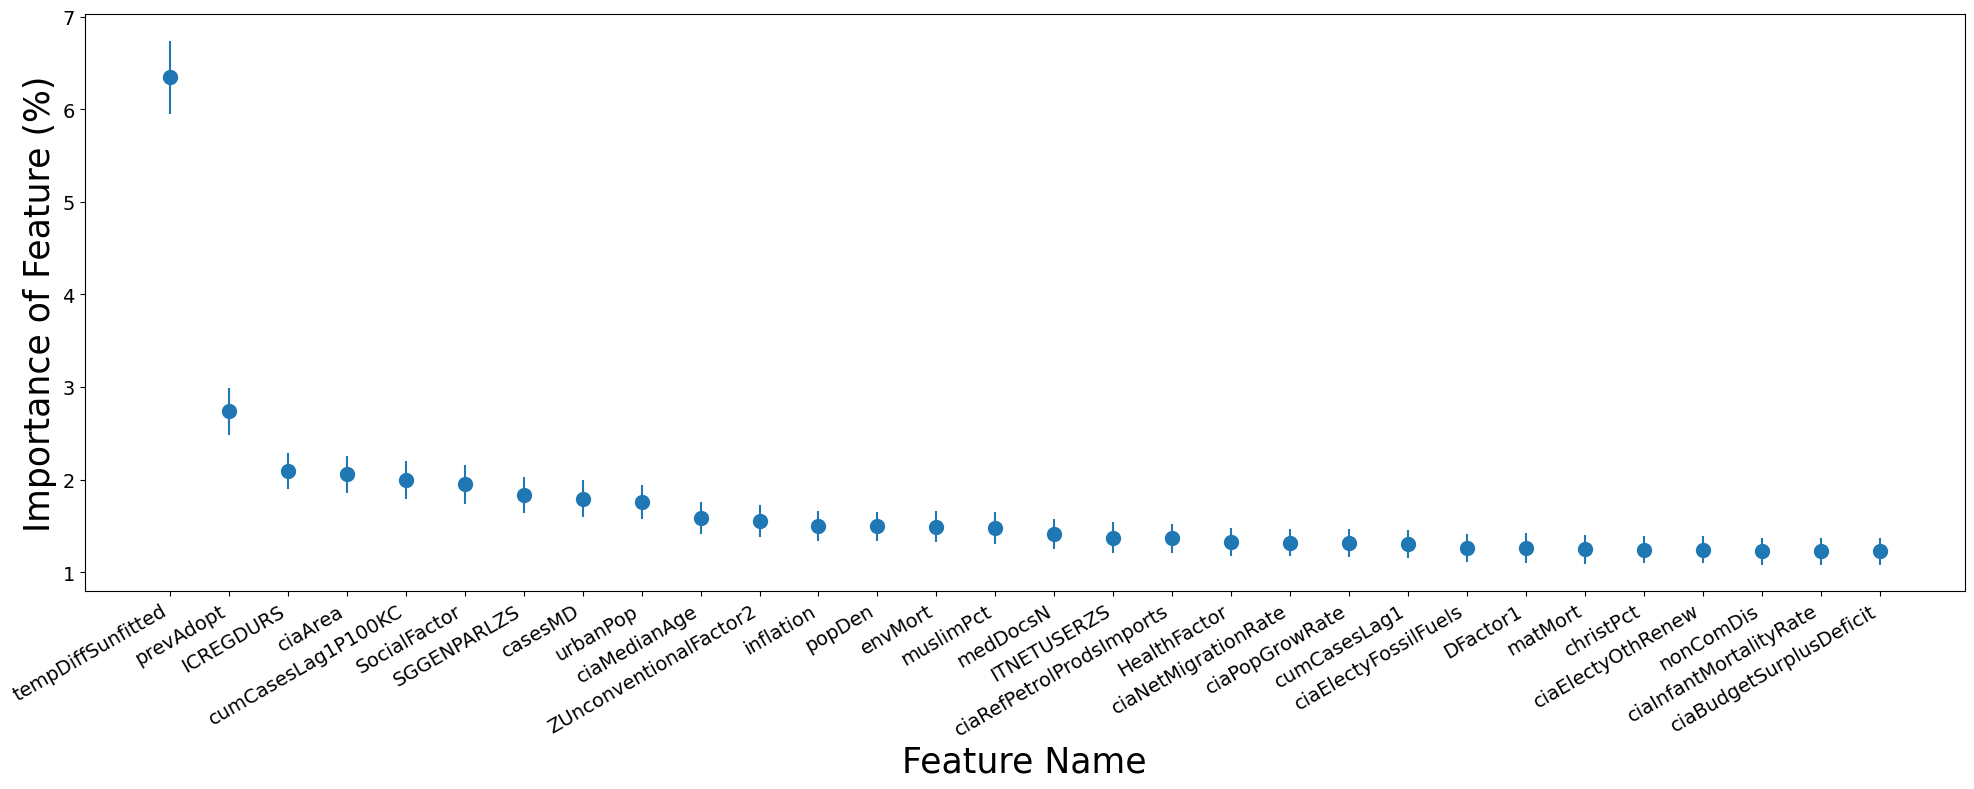

In [14]:
#with plt.xkcd():
fig = plt.figure(figsize=(20,8))
plt.errorbar(final_df.index, 'mean', yerr='99-conf', data=final_df, fmt='o', ms=10)
#plt.xticks(rotation=-60)
fig.autofmt_xdate()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature Name', fontsize=25)
plt.ylabel('Importance of Feature (%)', fontsize=25)
plt.tight_layout()
plt.savefig('../Plots/Reviewer/Feature-Importance_%s.png'%output_dir)